# Computational Programming with Python
### Lecture 6: Linear Algebra

### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson, Robert Klöfkorn


## This lecture

- NumPy arrays &hyphen; vectors
- NumPy arrays &hyphen; matrices
- Linear transformations &hyphen; rotation matrix in the plane

## NumPy arrays &hyphen; vectors
### The array type

Lists are almost like vectors but operations on lists are **not** linear algebra operations.

In [1]:
L1 = [1, 2]
L2 = [3, 4]
print("L1 + L2 =", L1 + L2)
print("3*L1 =", 3*L1)

L1 + L2 = [1, 2, 3, 4]
3*L1 = [1, 2, 1, 2, 1, 2]


#### Definition
An **array** represents a vector or a matrix in linear algebra. It is often initialised from a list or another vector. Operations `+`, `*`, `/`, `-` are all **elementwise**. `dot`is used for the scalar product.

## Vector usage

#### Example

In [2]:
from numpy import *
from scipy.linalg import norm

vec = array([3, 4]) # a vector in the plane

print("vec =", vec)
print("2*vec =", 2*vec)
print("vec*vec =", vec*vec)
print("vec/2 =", vec/2) 
print("vec/vec =", vec/vec) 

print("||vec|| =", norm(vec))
print("scalar product =", dot(vec, vec))

vec = [3 4]
2*vec = [6 8]
vec*vec = [ 9 16]
vec/2 = [1.5 2. ]
vec/vec = [1. 1.]
||vec|| = 5.0
scalar product = 25


## Vectors are similar to lists

In [3]:
L1 = [1, 2, 3]

v1 = array(L1)

print("L1 =", L1)
print("v1 =", v1)
print(type(L1))
print(type(v1))

L1 = [1, 2, 3]
v1 = [1 2 3]
<class 'list'>
<class 'numpy.ndarray'>


## Vectors are similar to lists (cont)

- Acess vectors via their indices

In [4]:
v = array([1, 2, 3])

print(v[0])

1


- The *length* of a vector is still obtained by the function `len`

In [5]:
print(len(v))

3


## Vectors are similar to lists (cont)

- Parts of vectors using slices

In [6]:
v = array([1, 2, 3])
print(v[:2])

[1 2]


- Replace parts of vectors using slices

In [7]:
v[:2] = [10, 20]
print(v)

[10 20  3]


## Vectors are not lists!

Operations are not the same:

- Operations `+` and `*` are different
- More operations are defined: `-`, `/`
- Numpy functions act elementwise on vectors: `sin`, `exp`, `sqrt`, etc.
- Scalar product with `dot`
- Vectors have a **fixed size**: no `append` method

## Vectors are not lists! (cont)

Two names are bound to the same list:

In [8]:
L1 = [1, 2]
L2 = L1
L1[0] = 10
print(L2)

[10, 2]


To make an actual copy, you can use the `copy` method, or make a slice.

In [9]:
L1 = [1, 2]
L2 = L1.copy()
L3 = L1[:]  # a slice of the entire list
L1[0] = 10
print("L2 =", L2)
print("L3 =", L3)

L2 = [1, 2]
L3 = [1, 2]


## Vectors are not lists! (cont)

- Vector slices, on the other hand, are **views**:

In [10]:
L1 = [1, 2, 3]

v1 = array([1, 2, 3])

L2 = L1[:2]
L2[0] = 10
print("now L1 = ", L1)

v2 = v1[:2]
v2[0] = 10
print("now v1 = ", v1)

now L1 =  [1, 2, 3]
now v1 =  [10  2  3]


## Vectors are not lists! (cont)

- Only **one type** throughout the whole vector

In [11]:

v1 = array([1., 2., 3.]) # don't forget the dots!
v2 = array([2, 0, 1.])   # one dot is enough

print(v1*v2)  # what about v1/v2

print(3*v1 + 2*v2)

print(type(v2[0]))

[2. 0. 3.]
[ 7.  6. 11.]
<class 'numpy.float64'>


## More examples

In [12]:
v1 = array([1., 2., 3.])
v2 = array([2, 0, 1.]) 

print("scalar product:", dot(v1, v2))

# access
v1[0] = 10
print("v1 =", v1)

# slices
v1[:2] = [0, 1]
print("v1 =", v1)
#v1[0:2] = [1, 2, 3]  # error

scalar product: 5.0
v1 = [10.  2.  3.]
v1 = [0. 1. 3.]


## Creating vectors &hyphen; `linspace`

The `linspace` function is convenient for creating equally spaced arrays.

In [13]:
xs = linspace(0, 10, 200) # 200 points between 0 and 10
print(xs[0])   # the first point is 0
print(xs[-1])  # the last point is 10

0.0
10.0


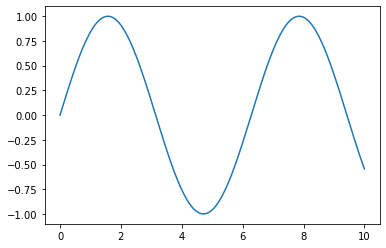

In [14]:
from matplotlib.pyplot import *
%matplotlib inline
plot(xs, sin(xs))

## Creating vectors &hyphen; `zeros`, `ones`, `full`

Some handy functions to quickly create vectors:

In [15]:
v1 = zeros(5)
print("v1 =", v1)

v2 = ones(3)
print("v2 =", v2)

v3 = full(4, 3.14)  # fill it with the value 3.14
print("v3 =", v3)

v1 = [0. 0. 0. 0. 0.]
v2 = [1. 1. 1.]
v3 = [3.14 3.14 3.14 3.14]


## Creating vectors using `dtype`

In [16]:
v1 = zeros(5, dtype = complex)
print("v1 =", v1)

v2 = ones(3, dtype = int) 
print("v2 =", v2)

v3 = full(4, "hello")
print("v3 =", v3)

v1 = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
v2 = [1 1 1]
v3 = ['hello' 'hello' 'hello' 'hello']


## Creating random vectors

Fill a vector with a random numbers in the interval [0, 1).

In [17]:
v1 = random.random(5)
print(v1) 

[0.46945472 0.86997364 0.36514081 0.88495116 0.53373261]


We can also "shuffle" the values in an array.

In [18]:
v2 = array([10, 20, 30, 40, 50, 60, 80])
random.shuffle(v2)
print(v2)

[50 10 30 60 20 80 40]


## Concatenating vectors

Since the `+` operation is redefined, we need a means to concatenate vectors. 

The command `hstack([v1, v2, ..., vn]) ` concatenates the vectors 
$v1, v2, \ldots, vn$.

In [19]:
v1 = [1, 2, 3]
v2 = [4, 5]
v3 = [6, 7, 8, 9]

v = hstack([v1, v2, v3])
print(v)

[1 2 3 4 5 6 7 8 9]


## Functions and arrays

As long as `+`, `-`, `*`, `/` and standard mathematical Numpy functions are used, a function value can be calculated elementwise.

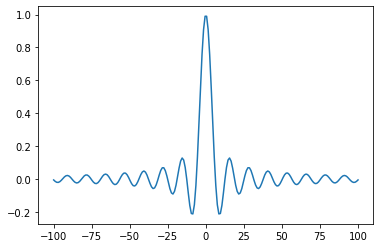

In [20]:
def my_func(x, A, omega):
    return A*sin(omega*x)/x

x = linspace(-100, 100, 200) # using an even number of values to avoid zero
y = my_func(x, 2, 0.5)
plot(x, y)

## Vectorized functions

Note that **not all functions** may be applied to vectors. For instance this one:

In [ ]:
def const(x):
    return 1

x = linspace(-100, 100, 50)
y = const(x) 

# what is the value of y?

We will see later how to automatically *vectorize* a function so that it works on vectors.

## NumPy arrays &hyphen; matrices

#### Definition
Matrices are represented by arrays of lists of **rows**, which are lists as well.

In [21]:
# An identity matrix
id_matrix = array([[1., 0.], [0., 1.]])

# Python allows this:
id_matrix = array([[1., 0],
                   [0., 1.]])

# which is more readable

print(id_matrix)

[[1. 0.]
 [0. 1.]]


## Accessing matrix entries

Matrix elements are accessed with **two** indices.

In [22]:
M = array([[1., 2.], [3., 4.]])

print(M[0, 0]) # first row, first column

print(M[-1, 0]) # last row, first column

1.0
3.0


Compare this to accessing list elements.

In [23]:
L = [[1., 2.], [3., 4.]]

print(L[0][0])

print(L[-1][0])

1.0
3.0


## Creating matrices &hyphen; `eye`, `zeros`, `full`

- `eye(n)` is the identity matrix of size $n$.
- `zeros([n, m])` fills an $n\times m$ matrix with zeroes
- `full([n, m], value)`fills an $n\times m$ matrix with `value`

In [24]:
id_matrix = eye(2)
M0 = zeros([2, 3])     # using a list [2, 3]
M1 = full((2, 3), 7)   # using a tuple (2, 3)

print(id_matrix)
print(M0)
print(M1)

[[1. 0.]
 [0. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[7 7 7]
 [7 7 7]]


## Creating random matrices

In [25]:
M1 = random.random((3, 4))
print(M1)

[[0.42659452 0.18372894 0.0637453  0.24758315]
 [0.28014874 0.08892508 0.89727563 0.83911236]
 [0.41798941 0.68363103 0.06227991 0.15197138]]


## Shape

The **shape** of a matrix is the tuple of its dimensions. The shape of an $n\times m$ matrix is (n,m). It is given by the *attribute* `shape`:

In [26]:
M = eye(3) 
print(M.shape)
V = array([1., 2., 1., 4.])
print(V.shape)               # tuple with one element

(3, 3)
(4,)


#### Tip
`zeros(A.shape)` returns a matrix with the same shape as A containing only zeros.

## Transpose

The transpose of a matrix $A_{ij}$ is a matrix $B$ such that

$$B_{ij} = A_{ji}.$$

By transposing a matrix you switch the two shape elements.

In [27]:
A = array([[1, 2, 3],
           [4, 5, 6]])
print("A.shape =", A.shape)

B = A.T   # A transpose
print("B.shape =", B.shape)
print("B =", B)

A.shape = (2, 3)
B.shape = (3, 2)
B = [[1 4]
 [2 5]
 [3 6]]


## 1D vectors and 2D row/column matrices

(here D stands for *tensor dimension*, i.e. the length of `shape`)

In [28]:
v = array([1, 2, 3])
Mcol = array([[1], 
              [2], 
              [3]])
Mrow = array([[1, 2, 3]])

print("v.shape = ", v.shape)
print("Mcol.shape = ", Mcol.shape)
print("Mrow.shape = ", Mrow.shape)

v.shape =  (3,)
Mcol.shape =  (3, 1)
Mrow.shape =  (1, 3)


Transposing a 1D vector doesn't change it

## Matrix multiplication

We can use the `dot` function for matrix multiplication.

If $A$ is a $n\times m$ matrix and $B$ a $m \times p$ matrix, then $AB$ is a $n\times p$ matrix.

In [29]:
A = array([[1, 0, 0],        # n = 2, m = 3
           [2, -1, 3]])
B = array([[2, 1, 0, 4],     # m = 3, p = 4
           [1, 1, -1, 0],
           [0, 1, 2, 2]])

  

AB = dot(A, B)
print(AB)
# BA = dot(B, A)  # error

[[ 2  1  0  4]
 [ 3  4  7 14]]


## Matrix vector multiplication

A matrix can be multipled with a vector using `dot`. The multiplication is matrix multiplication, as if the vector was a column or row matrix. The result is a vector.

$$ 
\left(
\begin{array}{rr}
1 & 2
\end{array}
\right)
\left(
\begin{array}{rr}
1 & 0 \\
4 & -1
\end{array}
\right) 
= 
\left(
\begin{array}{rr}
9 & -2
\end{array}
\right)
$$

$$
\left(
\begin{array}{rr}
1 & 0 \\
4 & -1
\end{array}
\right) 
\left(
\begin{array}{rr}
1 \\
2
\end{array}
\right)
= 
\left(
\begin{array}{rr}
1 \\
2
\end{array}
\right)
$$

In [30]:
A = array([[1, 0],
           [4, -1]])
v = array([1, 2])

vA = dot(v, A)
Av = dot(A, v)

print(vA)
print(Av)
print("vA.shape =", vA.shape, " Av.shape = ", Av.shape)

[ 9 -2]
[1 2]
vA.shape = (2,)  Av.shape =  (2,)


## Dot product

vector vector, `dot(x, y)`, scalar product

matrix matrix, `dot(A, B)`, matrix multiplication

matrix vector, `dot(A, x)`, matrix multiplication, treating vector as column matrix

vector matrix, `dot(x, A)`, matrix multiplication, treating vector as row matrix

## Linear transformations ‐ rotation matrix in the plane

### Definition

A **linear transformation** in the plane is a function $f:\mathbb{R}^2 \mapsto \mathbb{R}^2$  such that


$f(a\mathbf{u} + b\mathbf{v}) = af
(\mathbf{u}) + bf(\mathbf{v}) \text{ for all }a, b\in\mathbb{R} \text{ and } \mathbf{u}, \mathbf{v} \in \mathbb{R}^2$

## Matrices and linear transformations

Let $x= (x_1, x_2) \in \mathbb{R}^2$ and $y= (y_1, y_2) \in \mathbb{R}^2$. Let $y = f(x)$ be the function defined by

$$
\begin{cases}
y_1 = ax_1 + bx_1 \\
y_2 = cx_1 + dx_2
\end{cases}
$$

for some numbers $a, b, c, d$. Then matrix multiplication can be used to describe $f$.
Let 

$$A = 
\left(
\begin{array}{rr}
a & b \\
c & d
\end{array}
\right),
x = 
\left(
\begin{array}{rr}
x_1 \\
x_2
\end{array}
\right),
y = 
\left(
\begin{array}{rr}
y_1 \\
y_2
\end{array}
\right),
\text{ then }
\left(
\begin{array}{rr}
y_1 \\
y_2
\end{array}
\right)
=
\left(
\begin{array}{rr}
a & b \\
c & d
\end{array}
\right)
\left(
\begin{array}{rr}
x_1 \\
x_2
\end{array}
\right)
$$

$A$ is a **transformation matrix** of $f$, $y = f(x) = Ax$

## Finding the transformation matrix of a rotation in the plane

Let $\mathbf{e_1}, \mathbf{e_2}$ be two basis vectors and let $A$ be a transformation matrix that rotates a vector $\mathbf{u} = x\mathbf{e_1} + y\mathbf{e_2}$ an angle $\alpha $. To find $A$ it suffices to consider the basis vectors.

![rotated basis](http://cmc.education/slides/notebookImages/rotatedBasis.svg)

Now $ A\mathbf{u} = xA\mathbf{e_1} + yA\mathbf{e_1}.$

### Rotate a point

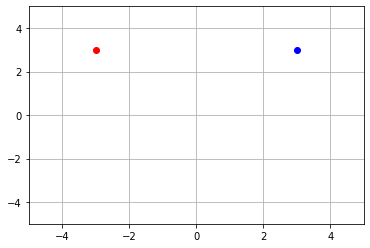

In [31]:
from matplotlib.pyplot import *
%matplotlib inline
alpha = pi/2
A = array([[cos(alpha), -sin(alpha)],
           [sin(alpha), cos(alpha)]])
x = 3
y = 3
P = array([x, y]) # a vector
AP = dot(A, P)    # a vector
plot(x, y, 'bo')
xlim(-5, 5)
ylim(-5, 5)
grid()
plot(*AP, 'ro')  # unpack to get x and y

### Rotate many points

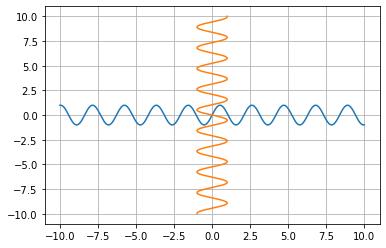

In [32]:
alpha = pi/2
A = array([[cos(alpha), -sin(alpha)],
           [sin(alpha), cos(alpha)]])
x = linspace(-10, 10, 200)
y = sin(3*x)
M = array([x, y]) # 2 times 200 matrix
AM = dot(A, M)    # 2 times 200 matrix
plot(x, y)
grid()
plot(*AM)  # unpack to get a x-list and a y-list